<a href="https://colab.research.google.com/github/sheikhhammaad/datascience/blob/master/10Aug20Missing_Values_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

In [ ]:
sns.load_dataset('iris')

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# Missing Values

In [ ]:

data = {'name': ['Michael', 'Jessica', 'Sue', 'Jake', 'Amy', 'Tye'],
        'gender':[None,'F',np.NaN,'F',np.NaN, 'M'],
        'height': [123, 145, 100 , np.NaN, None, 150],
        'weight': [10, np.NaN , 30, np.NaN, None, 20],
        'age': [14, None, 29 , np.NaN, 52, 45],
        }
df = pd.DataFrame(data, columns = ['name','gender', 'height', 'weight', 'age'])
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


In [ ]:
a = np.array([1,2,np.nan,4])

In [ ]:
a

array([ 1.,  2., nan,  4.])

In [ ]:
np.sum(a)

nan

In [ ]:
np.nansum(a)

7.0

# Detect missing value

In [ ]:
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    6 non-null      object 
 1   gender  3 non-null      object 
 2   height  4 non-null      float64
 3   weight  3 non-null      float64
 4   age     4 non-null      float64
dtypes: float64(3), object(2)
memory usage: 368.0+ bytes


In [ ]:
df.isnull()

,name,gender,height,weight,age
0,False,True,False,False,False
1,False,False,False,True,True
2,False,True,False,False,False
3,False,False,True,True,True
4,False,True,True,True,False
5,False,False,False,False,False


In [ ]:
df.isna()

,name,gender,height,weight,age
0,False,True,False,False,False
1,False,False,False,True,True
2,False,True,False,False,False
3,False,False,True,True,True
4,False,True,True,True,False
5,False,False,False,False,False


In [ ]:
df.isnull().sum()

name      0
gender    3
height    2
weight    3
age       2
dtype: int64

In [ ]:
df.notnull().sum()

name      6
gender    3
height    4
weight    3
age       4
dtype: int64

# Manage Missing Value

In [ ]:
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


In [ ]:
df.dropna(axis=0)

,name,gender,height,weight,age
5,Tye,M,150.0,20.0,45.0


In [ ]:
df.dropna(axis=1)

,name
0,Michael
1,Jessica
2,Sue
3,Jake
4,Amy
5,Tye


In [ ]:
df['age'].fillna(0)

0    14.0
1     0.0
2    29.0
3     0.0
4    52.0
5    45.0
Name: age, dtype: float64

In [ ]:
df['gender']

0    None
1       F
2     NaN
3       F
4     NaN
5       M
Name: gender, dtype: object

In [ ]:
df['gender'].fillna(method = 'ffill')

0    None
1       F
2       F
3       F
4       F
5       M
Name: gender, dtype: object

In [ ]:
df['gender'].fillna(method = 'bfill')

0    F
1    F
2    F
3    F
4    M
5    M
Name: gender, dtype: object

In [ ]:
df['height']

0    123.0
1    145.0
2    100.0
3      NaN
4      NaN
5    150.0
Name: height, dtype: float64

In [ ]:
df['height'].fillna(df.groupby('gender')['height'].transform('mean'), inplace = False)

0    123.0
1    145.0
2    100.0
3    145.0
4      NaN
5    150.0
Name: height, dtype: float64

In [ ]:
df['weight'].fill

0    10.0
1     NaN
2    30.0
3     NaN
4     NaN
5    20.0
Name: weight, dtype: float64

In [ ]:
df['age']

0    14.0
1     NaN
2    29.0
3     NaN
4    52.0
5    45.0
Name: age, dtype: float64

In [ ]:
df['age'].interpolate(inplace = False)

0    14.0
1    21.5
2    29.0
3    40.5
4    52.0
5    45.0
Name: age, dtype: float64

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

In [ ]:
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,21.5
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,40.5
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


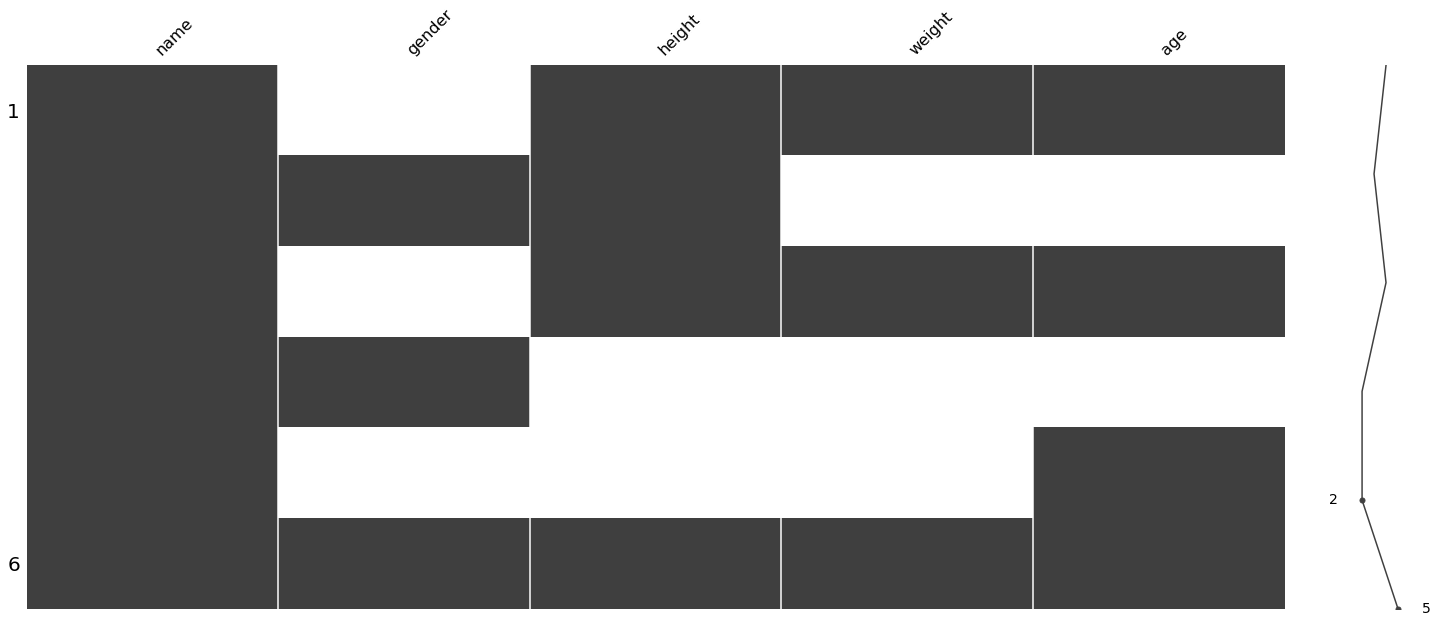

In [ ]:
msno.matrix(df)

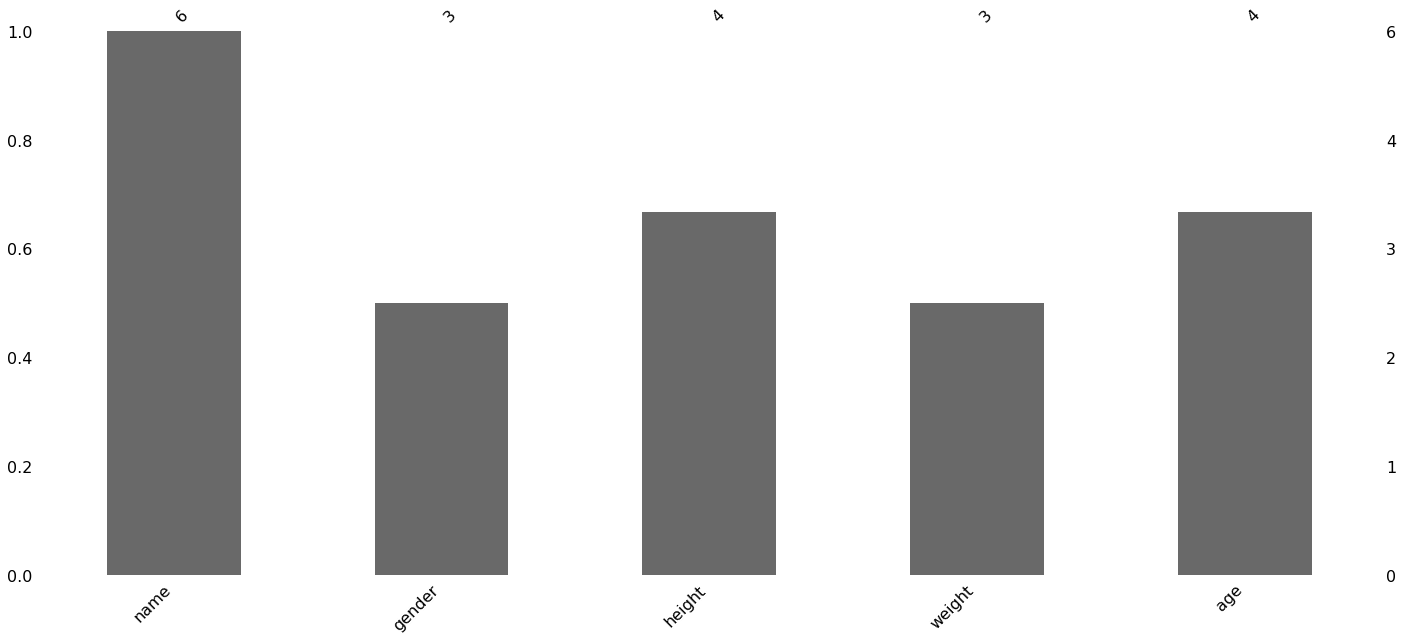

In [ ]:
msno.bar(df)